Importing Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import os

#recover data
input_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
reduced_df = pd.read_csv(os.path.join(input_data_path, 'reduced_data.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))
print("Loaded reduced_data shape:", reduced_df.shape)
print("Loaded y shape:", y.shape)

Loaded reduced_data shape: (297, 12)
Loaded y shape: (297, 1)


Implemnting models

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 Model  Accuracy  Precision    Recall        F1
0  Logestic_regression  0.800000   0.789111  0.800000  0.798190
1        Decision Tree  0.783333   0.799702  0.783333  0.786104
2        Random Forest  0.850000   0.850893  0.850000  0.850210
3                  SVM  0.816667   0.846875  0.816667  0.820724


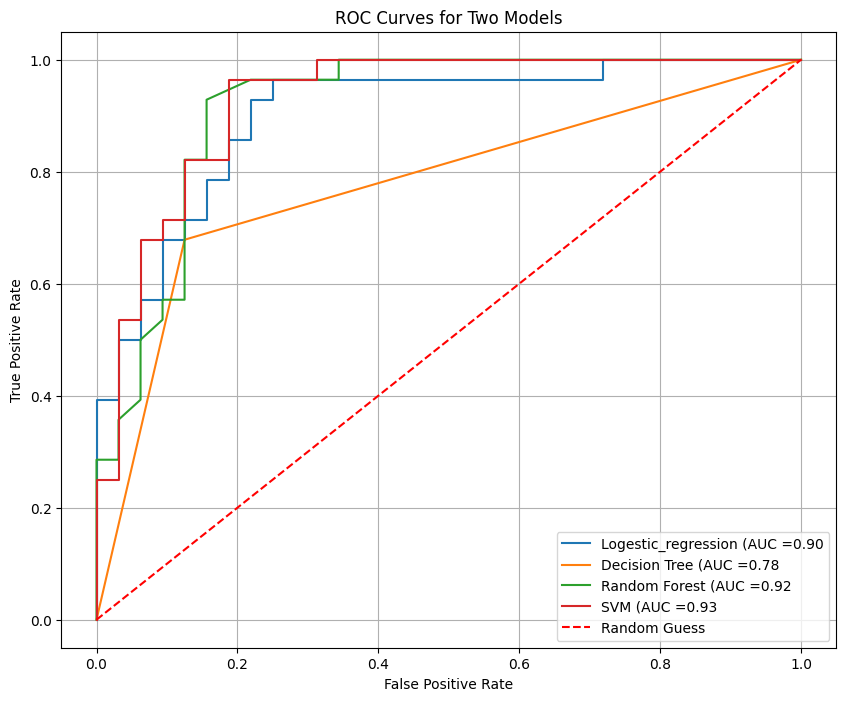

"plt.scatter(X_test_scaler,y_test,c='g',label='test points')\nplt.legend()\nplt.show()\nplt.scatter(X_test_scaler,y_svm_predict,c='b',label='predictd data SVM')\nplt.legend()\nplt.show()\nplt.scatter(X_test_scaler,y_Desciontree_predict,label='predicted data DT')\n#plt.scatter(reduced_df,y,c='y',label='original data')\nplt.legend()\nplt.show()\nplt.scatter(X_test_scaler,y_randomforest_predict,label='Predicted data RF')\nplt.legend()\nplt.show()"

In [ ]:
#train - test splitting
x_train,x_test,y_train,y_test=train_test_split(reduced_df,y,test_size=0.2,random_state=42,stratify=y)

'''#Scale Feature
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(x_train)
X_test_scaler=scaler.transform(x_test)'''

#-----making models-----

#Logestic Regression model
LogisticRegression_model=LogisticRegression(solver='liblinear',max_iter=1000,random_state=42)
LogisticRegression_model.fit(x_train,y_train)
y_logestic_predict=LogisticRegression_model.predict(x_test)
y_logestic_proba=LogisticRegression_model.predict_proba(x_test)[:,1]

#Decision tree model
DecisionTree_model=DecisionTreeClassifier(random_state=42)
DecisionTree_model.fit(x_train,y_train)
y_Desciontree_predict=DecisionTree_model.predict(x_test)
y_Desciontree_proba=DecisionTree_model.predict_proba(x_test)[:,1]

#Random Forest model
RandomForest_model=RandomForestClassifier(n_estimators=100,random_state=42)
RandomForest_model.fit(x_train,y_train)
y_randomforest_predict=RandomForest_model.predict(x_test)
y_randomforest_proba=RandomForest_model.predict_proba(x_test)[:,1]

#Support vector machine(SVM)
svm_model=SVC(random_state=42,probability=True)
svm_model.fit(x_train,y_train)
y_svm_predict=svm_model.predict(x_test)
y_svm_proba=svm_model.predict_proba(x_test)[:,1]

#Accuracy/predict/Recall/F1 scores
scores={
    'Model' :['Logestic_regression','Decision Tree','Random Forest','SVM'],
    'Accuracy' :[accuracy_score(y_test,y_logestic_predict),accuracy_score(y_test,y_Desciontree_predict),accuracy_score(y_test,y_randomforest_predict),accuracy_score(y_test,y_svm_predict)],
    'Precision':[precision_score(y_test,y_Desciontree_predict,average='weighted'),precision_score(y_Desciontree_predict,y_test,average='weighted'),precision_score(y_randomforest_predict,y_test,average='weighted'),precision_score(y_svm_predict,y_test,average='weighted')],
    'Recall' :[recall_score(y_test,y_logestic_predict,average='weighted'),recall_score(y_Desciontree_predict,y_test,average='weighted'),recall_score(y_randomforest_predict,y_test,average='weighted'),recall_score(y_svm_predict,y_test,average='weighted')],
    'F1' :[f1_score(y_test,y_logestic_predict,average='weighted'),f1_score(y_Desciontree_predict,y_test,average='weighted'),f1_score(y_randomforest_predict,y_test,average='weighted'),f1_score(y_svm_predict,y_test,average='weighted')]

}
AUC_probablties={
    'Logestic_regression' : y_logestic_proba,
    'Decision Tree' : y_Desciontree_proba,
    'Random Forest' : y_randomforest_proba,
    'SVM' : y_svm_proba
}
print(pd.DataFrame(scores))


#Plotting AUC Curve 
plt.figure(figsize=(10,8))
for model in ['Logestic_regression','Decision Tree','Random Forest','SVM']:
    fpr,tpr,_=roc_curve(y_test,AUC_probablties[model])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model} (AUC ={roc_auc :.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.grid(   )
plt.legend()
plt.show()

#plot data
#plt.scatter(X_train_scaler,y_train,c='r',label='training points')
'''plt.scatter(X_test_scaler,y_test,c='g',label='test points')
plt.legend()
plt.show()
plt.scatter(X_test_scaler,y_svm_predict,c='b',label='predictd data SVM')
plt.legend()
plt.show()
plt.scatter(X_test_scaler,y_Desciontree_predict,label='predicted data DT')
#plt.scatter(reduced_df,y,c='y',label='original data')
plt.legend()
plt.show()
plt.scatter(X_test_scaler,y_randomforest_predict,label='Predicted data RF')
plt.legend()
plt.show()'''